# UN Analysis

Analysis of UN actors in agreement-actor networks.


In [1]:
__author__      = 'Roy Gardner'

%run ./network_functions.py


## Load the agreement-actor data

- Load data into a binary-valued relation matrix (BVRM) with agreements in rows and actors in columns
- Matrix values are zero except where a relation between an agreement and an actor exists where the value is one
- Apart from the matrix other data are extracted or computed
- All data are stored in data_dict


In [2]:

data_path = './data/'
nodes_file = 'node_table.csv'
links_file = 'links_table.csv'
agreements_dict = 'agreements_dict.json'

data_dict = load_agreement_actor_data(nodes_file,links_file,agreements_dict,data_path)
print(data_dict.keys())


dict_keys(['agreements_dict', 'dates_dict', 'nodes_data', 'nodes_header', 'links_data', 'links_header', 'agreement_vertices', 'actor_vertices', 'vertices_dict', 'color_map', 'matrix'])


## Collect UN actor indices and IDs

In [12]:

un_actors_list = []

for actor_index,actor_id in enumerate(data_dict['actor_vertices']):
    if len(actor_id) == 0:
        continue
    actor_data = data_dict['vertices_dict'][actor_id]
    actor_name = actor_data[data_dict['nodes_header'].index('node_name')]
    if 'United Nations' in actor_name or actor_name.startswith('UN') or ' UN' in actor_name:
        un_actors_list.append((actor_index,actor_id,actor_name))

un_actors_list = sorted(un_actors_list,key=lambda t:t[2])
print(un_actors_list)


[(24, 'IGO_8', 'UN Security Council'), (84, 'IGO_950', 'UNAMID'), (144, 'IGO_616', 'UNISFA'), (161, 'IGO_672', 'UN Office on Drugs and Crimes'), (192, 'IGO_480', 'UNOMIG'), (223, 'IGO_391', 'United Nations Secretariat'), (249, 'IGO_536', 'UNPOS'), (318, 'IGO_459', "United Nations Children's Fund"), (351, 'IGO_315', 'UN General Assembly'), (451, 'COA_51', 'Group of Friends UNSG'), (505, 'IGO_678', 'United Nations Educational, Scientific and Cultural Organization'), (510, 'IGO_640', 'Office of the United Nations High Commissioner for Human Rights'), (602, 'IGO_274', 'UNOMB'), (608, 'IGO_64', 'United Nations Development Programme'), (678, 'IGO_831', 'UNMISS'), (688, 'IGO_405', 'UNMIBH'), (709, 'IGO_49', 'United Nations (General)'), (750, 'IGO_386', 'UN Secretary General'), (786, 'IGO_854', 'UNMIS'), (790, 'IGO_750', 'UNSMIL'), (832, 'IGO_454', 'UNMOT'), (861, 'IGO_795', 'UNCRO'), (887, 'IGO_355', 'UNPROFOR'), (933, 'IGO_674', 'United Nations Population Fund'), (947, 'POL_318', 'UNITA'), (

## Get UN actor biadjacency matrices

There are two matrices:

1. UN-only matrix: 
    - Rows are agreements that have at least one UN signatory
    - Columns are UN actors
2. UN actors and non-UN co-signatories matrix:
    - Rows are agreements that have at least one UN signatory (as above)
    - Columns are all the actors who are signatories to the row agreements

The indices of the agreements and actors that constitute the above matrices are:

- agreement_indices: Indices into `data_dict['agreement_vertices']` and therefore rows of `data_dict['matrix']`
- un_indices: Indices into `data_dict['actor_vertices']` and therefore columns of `data_dict['matrix']` for UN actors only
- actor_indices: Indices into `data_dict['actor_vertices']` and therefore columns of `data_dict['matrix']` for UN actors and co-signatories


In [13]:
un_indices = [t[0] for t in un_actors_list]

matrix = data_dict['matrix']

# Reduce the matrix to UN actor columns only
reduced_matrix = matrix[np.ix_(range(0,matrix.shape[0]),un_indices)]
# Get indices of agreement row containing at least one non-zero value, i.e., agreements signed by at least
# one of the UN actors
indices = np.nonzero(reduced_matrix)
agreement_indices = list(set(indices[0]))

# This is the UN actors only matrix
un_matrix = matrix[np.ix_(agreement_indices,un_indices)]
print(un_matrix.shape)

# Reduce the complete matrix to the UN agreement rows and all actors
reduced_matrix = matrix[np.ix_(agreement_indices,range(0,matrix.shape[1]))]

# Get indices of all non-zero actor columns for the agreement rows, i.e., UN actors and co-signatories
indices = np.nonzero(reduced_matrix)
actor_indices = list(set(indices[1]))

# This is the UN actors and non-UN co-signatories matrix
un_cosign_matrix = matrix[np.ix_(agreement_indices,actor_indices)]
print(un_cosign_matrix.shape)
print()

print('There are',un_matrix.shape[0],'agreements signed by at least one of',un_matrix.shape[1],\
      'UN actors, and one or more of',un_cosign_matrix.shape[1] - un_matrix.shape[1],'non-UN actors')

(372, 27)
(372, 537)

There are 372 agreements signed by at least one of 27 UN actors, and one or more of 510 non-UN actors


### Analysis: UN-only

[(272, (709, 'IGO_49', 'United Nations (General)')), (48, (887, 'IGO_355', 'UNPROFOR')), (27, (24, 'IGO_8', 'UN Security Council')), (27, (750, 'IGO_386', 'UN Secretary General')), (15, (451, 'COA_51', 'Group of Friends UNSG')), (9, (192, 'IGO_480', 'UNOMIG')), (8, (602, 'IGO_274', 'UNOMB')), (5, (790, 'IGO_750', 'UNSMIL')), (4, (608, 'IGO_64', 'United Nations Development Programme')), (3, (318, 'IGO_459', "United Nations Children's Fund")), (2, (161, 'IGO_672', 'UN Office on Drugs and Crimes')), (2, (223, 'IGO_391', 'United Nations Secretariat')), (2, (249, 'IGO_536', 'UNPOS')), (2, (989, 'IGO_440', 'United Nations Human Rights Council')), (1, (84, 'IGO_950', 'UNAMID')), (1, (144, 'IGO_616', 'UNISFA')), (1, (351, 'IGO_315', 'UN General Assembly')), (1, (505, 'IGO_678', 'United Nations Educational, Scientific and Cultural Organization')), (1, (510, 'IGO_640', 'Office of the United Nations High Commissioner for Human Rights')), (1, (678, 'IGO_831', 'UNMISS')), (1, (688, 'IGO_405', 'UNMI

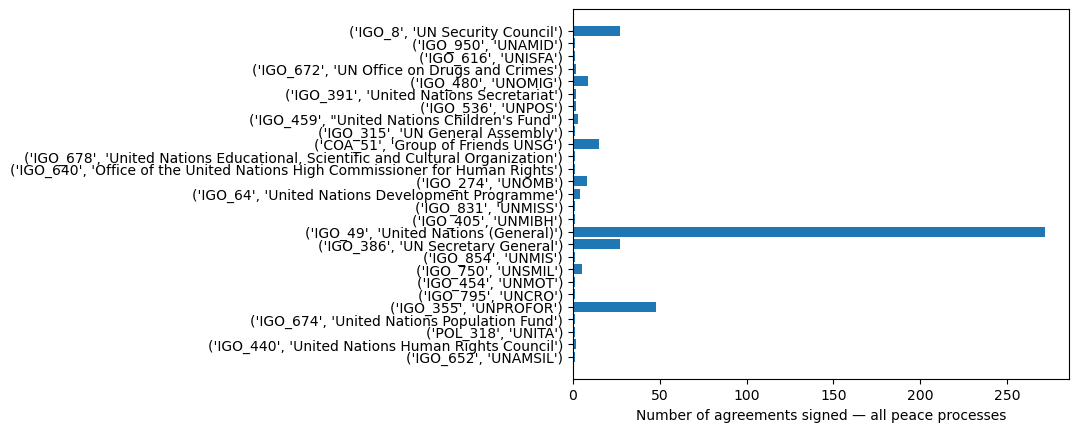

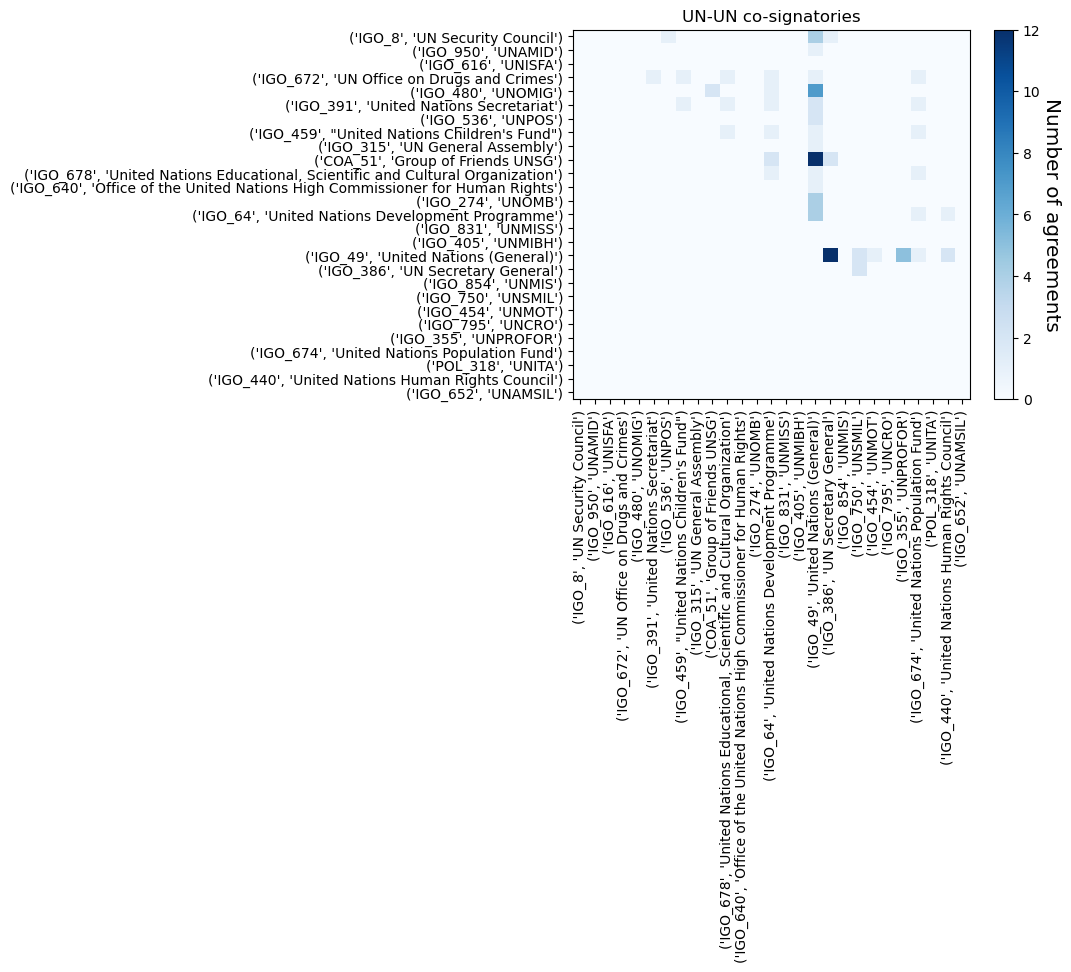

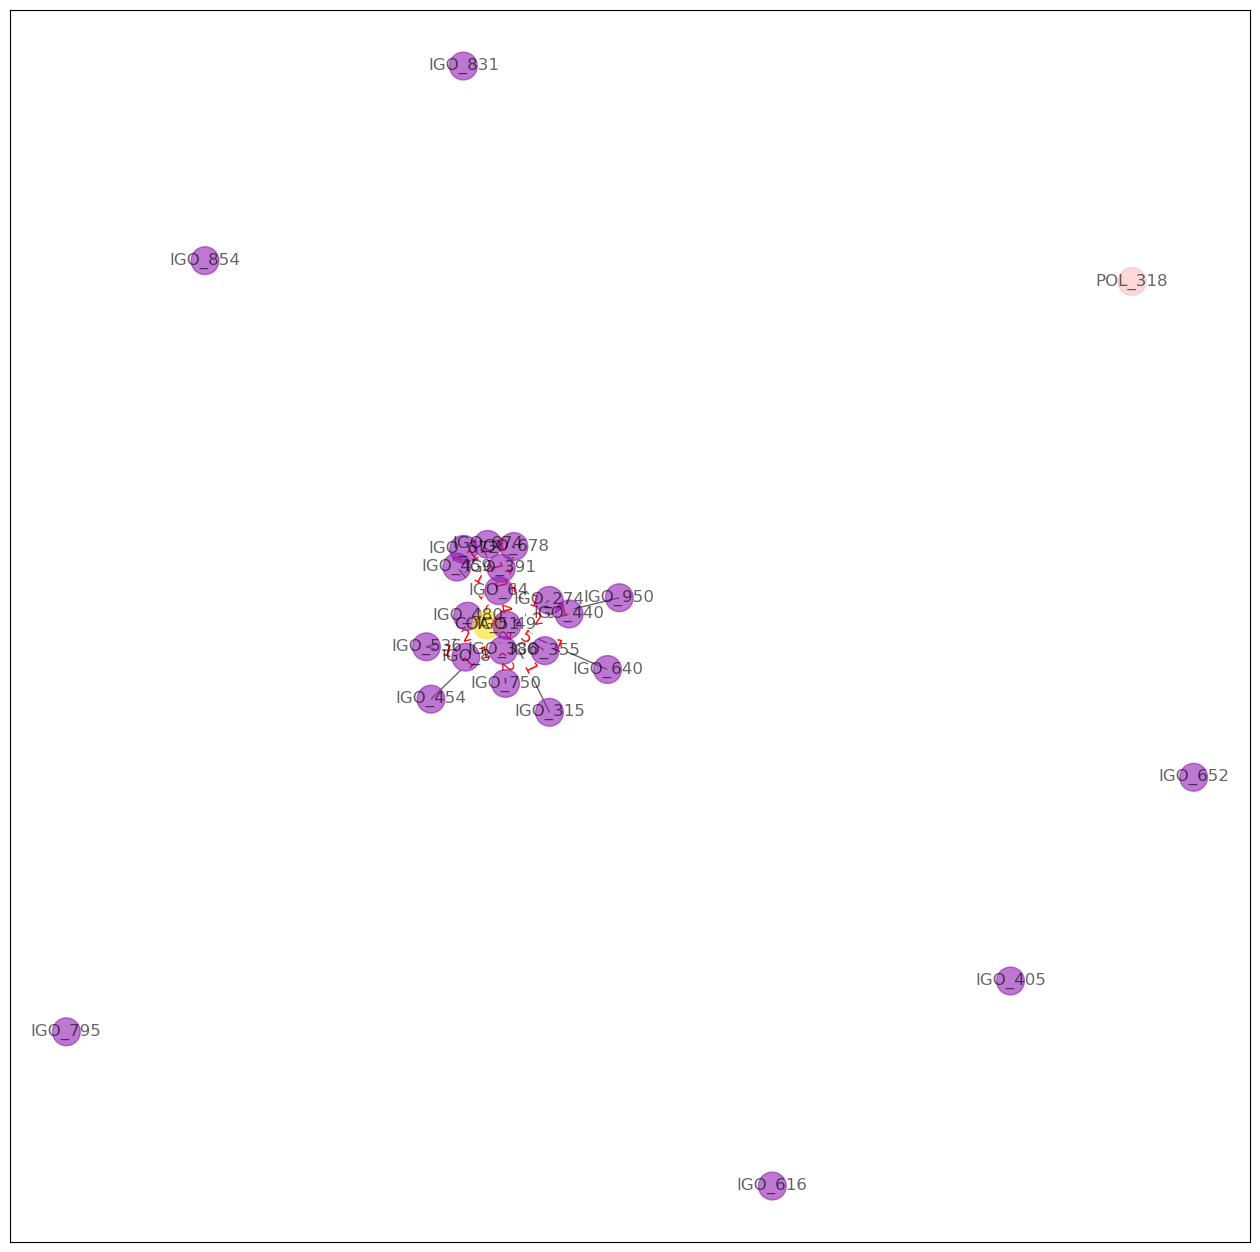

('Group of Friends UNSG', 'United Nations (General)', 12)
('United Nations (General)', 'UN Secretary General', 12)
('UNOMIG', 'United Nations (General)', 7)
('United Nations (General)', 'UNPROFOR', 5)
('UN Security Council', 'United Nations (General)', 4)
('UNOMB', 'United Nations (General)', 4)
('United Nations Development Programme', 'United Nations (General)', 4)
('UNOMIG', 'Group of Friends UNSG', 2)
('United Nations Secretariat', 'United Nations (General)', 2)
('UNPOS', 'United Nations (General)', 2)
('Group of Friends UNSG', 'United Nations Development Programme', 2)
('Group of Friends UNSG', 'UN Secretary General', 2)
('United Nations (General)', 'UNSMIL', 2)
('United Nations (General)', 'United Nations Human Rights Council', 2)
('UN Secretary General', 'UNSMIL', 2)
('UN Security Council', 'UNPOS', 1)
('UN Security Council', 'UN Secretary General', 1)
('UNAMID', 'United Nations (General)', 1)
('UN Office on Drugs and Crimes', 'United Nations Secretariat', 1)
('UN Office on Drugs

In [14]:
# Get UN actor labels

label_list = [(t[1],t[2]) for t in un_actors_list]

co_matrices = get_cooccurrence_matrices(un_matrix)


# Co-occurrence diagonal is the columns marginal of the UN-only matrix

diag = np.diag(co_matrices[0])
a = list(zip(diag,un_actors_list))
a = sorted(a,key=lambda t:t[0],reverse=True)
print(a)

plt.barh(range(0,len(diag)),diag)
plt.yticks(range(0,len(label_list)),label_list)
plt.xlabel('Number of agreements signed — all peace processes')
plt.gca().invert_yaxis()
plt.show()

# Upper triangle of actor co-occurence matrix
actor_upper = np.triu(co_matrices[0],k=1)

plt.imshow(actor_upper,aspect='auto',cmap=plt.cm.Blues)
plt.xticks(range(0,len(label_list)),label_list,rotation=90)
plt.yticks(range(0,len(label_list)),label_list)
cbar = plt.colorbar()
cbar.set_label('Number of agreements',rotation=270,labelpad=15,fontsize='x-large')
plt.title('UN-UN co-signatories')
plt.show()

display_comatrix_as_networkx_graph(co_matrices[0],un_indices,data_dict['actor_vertices'],data_dict)

rc = np.nonzero(actor_upper) # Row and column indices of non-zero pairs
z = list(zip(list(rc[0]),list(rc[1])))
scores = [(un_actors_list[t[0]][2],un_actors_list[t[1]][2],actor_upper[t[0]][t[1]]) for t in z]
scores = sorted(scores,key=lambda t:t[2],reverse=True)
for t in scores:
    print(t)


### Analysis: UN and non-UN co-signatories

In [20]:
co_matrices = get_cooccurrence_matrices(un_cosign_matrix)
actor_upper = np.triu(co_matrices[0],k=1)


un_cosign_actor_list = []
for actor_index in actor_indices:
    actor_id = data_dict['actor_vertices'][actor_index]
    actor_data = data_dict['vertices_dict'][actor_id]
    actor_name = actor_data[data_dict['nodes_header'].index('node_name')]
    un_cosign_actor_list.append((actor_index,actor_id,actor_name))

#diag = np.diag(co_matrices[0])
#a = list(zip(diag,un_cosign_actor_list))
#a = sorted(a,key=lambda t:t[0],reverse=True)
#print(a)

rc = np.nonzero(actor_upper) # Row and column indices of non-zero pairs
z = list(zip(list(rc[0]),list(rc[1])))
scores = [(un_cosign_actor_list[t[0]][2],un_cosign_actor_list[t[1]][2],actor_upper[t[0]][t[1]]) for t in z if\
             un_cosign_actor_list[t[0]][0] in un_indices or un_cosign_actor_list[t[1]][0] in un_indices]
scores = sorted(scores,key=lambda t:t[2],reverse=True)
for t in scores[0:40]:
    print(t)


('United Nations (General)', 'African Union', 65)
('United Nations (General)', 'United States', 62)
('European Union', 'United Nations (General)', 51)
('Russia', 'United Nations (General)', 47)
('France', 'United Nations (General)', 47)
('United Kingdom', 'United Nations (General)', 41)
('United Nations (General)', 'Organization of African Unity', 30)
('Georgia', 'United Nations (General)', 28)
('Germany', 'United Nations (General)', 28)
('United Nations (General)', 'Abkhazia', 27)
('South Africa', 'United Nations (General)', 24)
('Sudan', 'United Nations (General)', 22)
('Organization for Security and Cooperation in Europe', 'United Nations (General)', 21)
('United Nations (General)', 'Congo, Democratic Republic of the', 21)
('Economic Community of West African States', 'United Nations (General)', 20)
('China', 'United Nations (General)', 20)
('Nigeria', 'United Nations (General)', 20)
('United Nations (General)', 'Uganda', 20)
('Canada', 'United Nations (General)', 19)
('Norway', 'Un